In [1]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()

    series_labels = pd.DataFrame(list_labels)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['id','label']

In [2]:
def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps)

    return df_pumps

df_data = load_wells()


In [3]:
df_labels = load_labels()

df_labels.columns = ['id','label']

In [5]:
df_labels = df_labels.sort(['id'])

In [9]:
df_data = load_wells()

df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']


In [11]:
df_data = df_data.sort(['id'])


In [12]:
a = df_data.scheme_management.unique()
print a
df_data.scheme_management.replace(a,(0,0,0,0,0,1,0,0,0,0,0,0,0),inplace=True)
a = df_data.scheme_management.unique()
print a

['VWC' None 'Water Board' 'Private operator' 'WUA' 'Water authority' 'WUG'
 'Other' 'Company' 'Parastatal' 'SWC' 'Trust' 'None']
[0 1]


In [13]:
a = df_data.extraction_type_class.unique()
print a
df_data.extraction_type_class.replace(a,(0,0,0,1,1,0,0),inplace=True)
a = df_data.extraction_type_class.unique()
print a

['handpump' 'rope pump' 'motorpump' 'gravity' 'submersible' 'other'
 'wind-powered']
[0 1]


In [16]:
a = df_data.payment.unique()
print a
df_data.payment.replace(a,(0,0,1,1,1,1,0),inplace=True)
a = df_data.extraction_type_class.unique()
print a

['unknown' 'never pay' 'pay per bucket' 'pay when scheme fails'
 'pay monthly' 'pay annually' 'other']
[0 1]


In [18]:
a = df_data.water_quality.unique()
print a
df_data.water_quality.replace(a,(0,0,0,1,0,0,0,0),inplace=True)
a = df_data.extraction_type_class.unique()
print a

['milky' 'soft' 'salty' 'salty abandoned' 'coloured' 'unknown' 'fluoride'
 'fluoride abandoned']
[0 1]


In [20]:
a = df_data.quantity.unique()
print a
df_data.quantity.replace(a,(1,1,1,0,0),inplace=True)
a = df_data.quantity.unique()
print a

['enough' 'insufficient' 'dry' 'seasonal' 'unknown']
[1 0]


In [24]:
a = df_data.source.unique()
print a
df_data.source.replace(a,(0,1,0,0,1,1,0,0,1,0),inplace=True)
a = df_data.source.unique()
print a

['shallow well' 'machine dbh' 'spring' 'rainwater harvesting' 'river'
 'lake' 'other' 'dam' 'hand dtw' 'unknown']
[0 1]


In [26]:
a = df_data.source_class.unique()
print a
df_data.source_class.replace(a,(1,0,0),inplace=True)
a = df_data.source_class.unique()
print a

['groundwater' 'surface' 'unknown']
[1 0]


In [28]:
a = df_data.waterpoint_type.unique()
print a
df_data.waterpoint_type.replace(a,(0,1,0,0,0,0,0),inplace=True)
a = df_data.waterpoint_type.unique()
print a

['hand pump' 'communal standpipe multiple' 'communal standpipe' 'other'
 'improved spring' 'cattle trough' 'dam']
[0 1]


In [30]:

df_data = df_data[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population','scheme_management','water_quality','quantity','extraction_type_class','payment',\
                  'source','source_class','waterpoint_type']]

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)

print '-'
print X_pumps_train.head()
print '-'
print y_pumps_train.head()
print '-'
print X_pumps_test.head()
print '-'
print y_pumps_test.head()


-
          id  amount_tsh  gps_height  longitude      latitude  region_code  \
19264  42628           0        1365  34.570084 -8.838753e+00           11   
1374   26072           0        1481  34.051321 -1.906929e+00           20   
32863   7782           0         831  29.696167 -4.918685e+00           16   
29904   9186           0         405  38.680427 -1.074818e+01           90   
57115  46261           0           0   0.000000 -2.000000e-08           17   

       district_code  population  scheme_management  water_quality  quantity  \
19264              4          52                  0              0         1   
1374               4         250                  0              0         1   
32863              4           0                  0              0         1   
29904             33           1                  0              0         1   
57115              1           0                  0              0         1   

       extraction_type_class  payment  source  s

In [31]:
import pylab as pl
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

Neighbors: 1, Accuracy: 0.481347
Neighbors: 2, Accuracy: 0.517845
Neighbors: 3, Accuracy: 0.518721
Neighbors: 4, Accuracy: 0.525589
Neighbors: 5, Accuracy: 0.520741
Neighbors: 6, Accuracy: 0.530236
Neighbors: 7, Accuracy: 0.528687
Neighbors: 8, Accuracy: 0.529360
Neighbors: 9, Accuracy: 0.531785


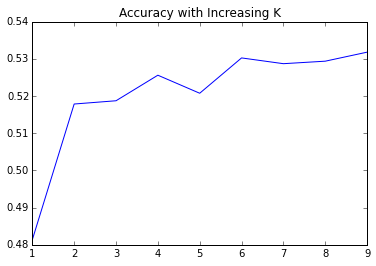

In [32]:
%matplotlib inline

results = []

for n in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=n)

    knn = clf.fit(X_pumps_train, y_pumps_train)
    preds = clf.predict(X_pumps_test)
    accuracy = np.where(preds==y_pumps_test, 1, 0).sum() / float(len(y_pumps_test))

    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])


results = pd.DataFrame(results, columns=["n", "accuracy"])

for_later = results

pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

In [33]:
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)

y_pumps_train_lbl = y_pumps_train[['label']]

logreg = LogisticRegression()

logreg.fit(X_pumps_train, y_pumps_train_lbl)

a = logreg.predict(X_pumps_test)
result = logreg.score(X_pumps_test, y_pumps_test[['label']])

print 'Logistic Regression Score:',str(result)

Logistic Regression Score: 0.576767676768


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from sklearn.naive_bayes import GaussianNB

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

gaussian = GaussianNB()
gaussian.fit(X_pumps_train, y_pumps_train_lbl)
result = gaussian.score(X_pumps_test, y_pumps_test_lbl)

a = gaussian.predict(X_pumps_test)
v = gaussian.predict_proba(X_pumps_test)
result = gaussian.score(X_pumps_test, y_pumps_test_lbl)

print 'Gaussian Regression Score:',str(result)

Gaussian Regression Score: 0.543232323232


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.svm import SVC

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

svc = SVC()
svc.fit(X_pumps_train, y_pumps_train_lbl)
a = svc.predict(X_pumps_test)
result = svc.score(X_pumps_test, y_pumps_test_lbl)

print 'SVC Regression Score:',str(result)

SVC Regression Score: 0.54101010101


//anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [39]:
from sklearn.tree import DecisionTreeClassifier

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

dtc = DecisionTreeClassifier()
dtc.fit(X_pumps_train, y_pumps_train_lbl)
a = dtc.predict(X_pumps_test)
result = dtc.score(X_pumps_test, y_pumps_test_lbl)

print 'DTC Regression Score:',str(result)


DTC Regression Score: 0.66531986532


In [40]:
from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]
    
rfc = RandomForestClassifier()
x = rfc.fit(X_pumps_train, y_pumps_train_lbl)
a = rfc.predict(X_pumps_test)

result = rfc.score(X_pumps_test, y_pumps_test_lbl)

print 'SVC Regression Score:',str(result)


SVC Regression Score: 0.716835016835


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [41]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv')
print test.head()

test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population','scheme_management','water_quality','quantity','extraction_type_class','payment',\
                  'source','source_class','waterpoint_type']]
print test.head()

      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785           0    2013-02-04                    Dmdd        1996   
1  51630           0    2013-02-04  Government Of Tanzania        1569   
2  17168           0    2013-02-01                     NaN        1567   
3  45559           0    2013-01-22              Finn Water         267   
4  49871         500    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

           ...          payment_type water_quality quality_group  \
0          ...          

In [43]:
a = test.scheme_management.unique()
print a
test.scheme_management.replace(a,(0,0,0,0,0,0,0,0,1,0,0,0,),inplace=True)
a = test.scheme_management.unique()
print a

['Parastatal' 'VWC' 'Water Board' nan 'Other' 'SWC' 'WUG' 'WUA'
 'Water authority' 'Company' 'Private operator' 'Trust']
[0 1]


In [45]:
a = test.extraction_type_class.unique()
print a
test.extraction_type_class.replace(a,(0,1,0,1,0,0,0),inplace=True)
a = test.extraction_type_class.unique()
print a

['other' 'gravity' 'handpump' 'submersible' 'motorpump' 'rope pump'
 'wind-powered']
[0 1]


In [47]:
a = test.payment.unique()
print a
test.payment.replace(a,(0,0,1,1,1,1,0),inplace=True)
a = test.extraction_type_class.unique()
print a

['never pay' 'unknown' 'pay monthly' 'pay per bucket' 'pay annually'
 'pay when scheme fails' 'other']
[0 1]


In [49]:
a = test.water_quality.unique()
print a
test.water_quality.replace(a,(0,0,0,0,1,0,0,0),inplace=True)
a = test.water_quality.unique()
print a

['soft' 'salty' 'milky' 'unknown' 'salty abandoned' 'coloured' 'fluoride'
 'fluoride abandoned']
[0 1]


In [51]:
a = test.quantity.unique()
print a
test.quantity.replace(a,(0,1,1,1,0),inplace=True)
a = test.quantity.unique()
print a

['seasonal' 'insufficient' 'dry' 'enough' 'unknown']
[0 1]


In [53]:
a = test.source.unique()
print a
test.source.replace(a,(1,0,0,1,1,1,0,0,0,0),inplace=True)
a = test.source.unique()
print a

['rainwater harvesting' 'spring' 'shallow well' 'machine dbh' 'river'
 'lake' 'dam' 'hand dtw' 'unknown' 'other']
[1 0]


In [55]:
a = test.source_class.unique()
print a
test.source_class.replace(a,(0,1,0),inplace=True)
a = test.source_class.unique()
print a

['surface' 'groundwater' 'unknown']
[0 1]


In [57]:
a = test.waterpoint_type.unique()
print a
test.waterpoint_type.replace(a,(0,1,0,0,0,0,0),inplace=True)
a = test.waterpoint_type.unique()
print a

['other' 'communal standpipe' 'hand pump' 'communal standpipe multiple'
 'improved spring' 'cattle trough' 'dam']
[0 1]


In [58]:
print test.head()
print ' - '
print test.tail()


      id  amount_tsh  gps_height  longitude   latitude  region_code  \
0  50785           0        1996  35.290799  -4.059696           21   
1  51630           0        1569  36.656709  -3.309214            2   
2  17168           0        1567  34.767863  -5.004344           13   
3  45559           0         267  38.058046  -9.418672           80   
4  49871         500        1260  35.006123 -10.950412           10   

   district_code  population  scheme_management  water_quality  quantity  \
0              3         321                  0              0         0   
1              2         300                  0              0         1   
2              2         500                  0              0         1   
3             43         250                  0              0         1   
4              3          60                  0              0         1   

   extraction_type_class  payment  source  source_class  waterpoint_type  
0                      0        0       1

In [61]:
pred = dtc.predict(test)

print type(pred)
print pred


<type 'numpy.ndarray'>
['functional' 'functional needs repair' 'functional' ..., 'non functional'
 'non functional' 'non functional']


In [62]:

to_submit = []
print len(test)
for ind in range(len(test)):
    ids = test.id[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_4.csv', sep=',', index=False)


14850
      id             status_group
0  50785               functional
1  51630  functional needs repair
2  17168               functional
3  45559           non functional
4  49871  functional needs repair
          id    status_group
14845  39307      functional
14846  18990      functional
14847  28749  non functional
14848  33492  non functional
14849  68707  non functional


In [ ]:
'''
sklearn.featureselection.VarianceThresholds
'''